FUTURE WEALTH ESTIMATOR
---

*PROYECTO CREADO EN VBA pero presentado como python notebook para insertar imágenes*.
Como desventaja se vuelve dificil distinguir entre comentarios y asignación de valores string y propiedades.

---


Al ser imposible en cualquier función o fórmula financiera de excel agregar cambios en la tasa de rendimiento y aportaciones, además de retiros. Decidí realizar un formulario que en una hoja haga estimaciones extensas con estos tres parametros además de los iniciales.


El fin es estimar el patrimonio que una persona podría formar en un máximo de 5200 periodos, tomando en cuenta el capital inicial, aportaciones periódicas y tasa promedio de rendimiento con cambios esperados, además de retiros que se tengan contemplados. 

Se hace un calculo acumulado con interés compuesto. Se asume que mientras no haya retiros se reinvierten retornos de capital y rendimientos.

Se enfatiza en que es solo un estimado, pues ningún instrumento financiero garantiza una tasa fija de rendimiento sin riesgo.

*El código se encuentra debajo del ejemplo y sus imágenes.*

Ejemplo

Usted desea saber su posible patrimonio generado en los próximos 15 años (180 meses) por inversión, bajo las siguientes condiciones:


1.   Invierte un ahorro de 50,000 en el primer periodo.
2.   Inicia con aportaciones mensuales de $10,000.
3. Diversifica su portafolio de manera que logra un rendimiento del 12% anual o 1% mensual.
4. A lo largo de esos 15 años es capaz de aumentar sus aportaciones (como se muestra en la siguiente imágen) hasta llegar a 70,000 por mes a partir del año 13 (además de los rendimientos reinvertidos que ya se incluyen en el cálculo).
5. A partir del primer año cambia a una estrategía de inversión agresiva en la que logra un rendimiento promedio del 20% anual o 1.66 mensual.
6. Supone un retiro en el año 5 de 200,000.
7. Supone otro retiro en el año 9 (mes 108) de 500,000.
8. A partir del año 7 (mes 84) adopta una postura de inversión más conservadora que le genera en promedio 15% anual ó 1.25% mensual.








Formulario Principal

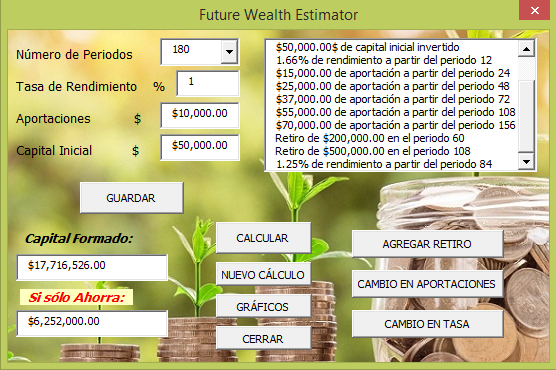

Inputs para agregar retiros y cambios en tasa de rendimiento y aportaciones.

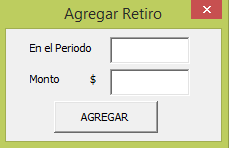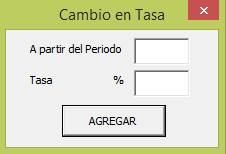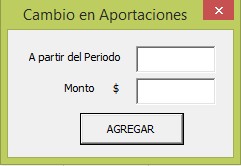

Gráficos

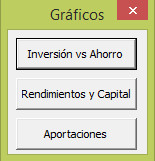
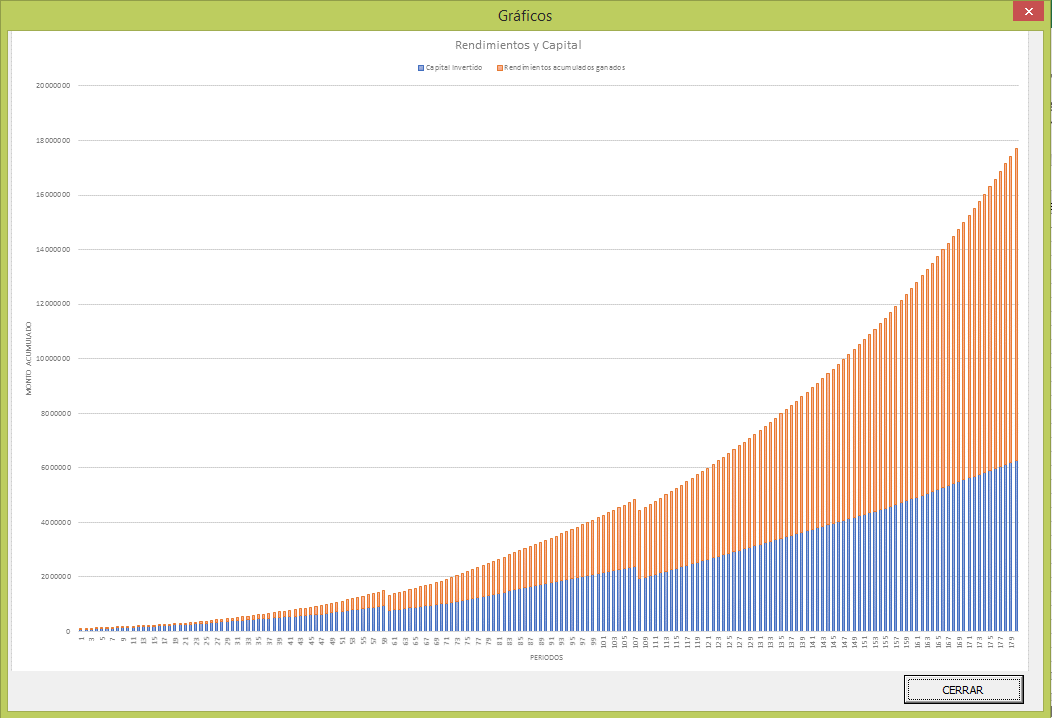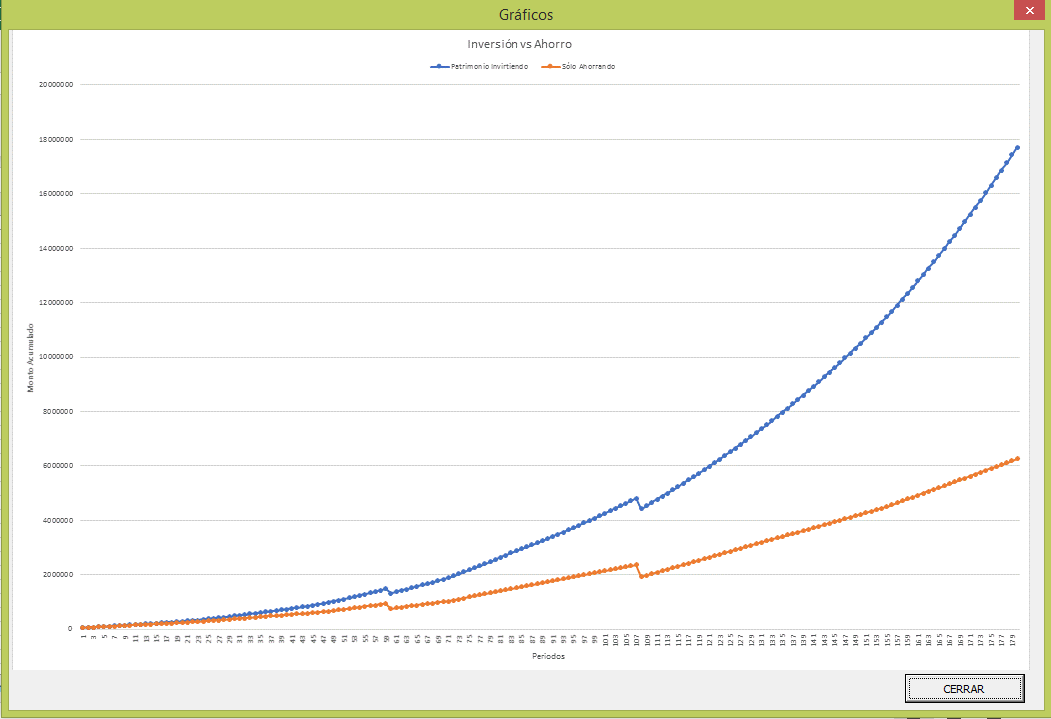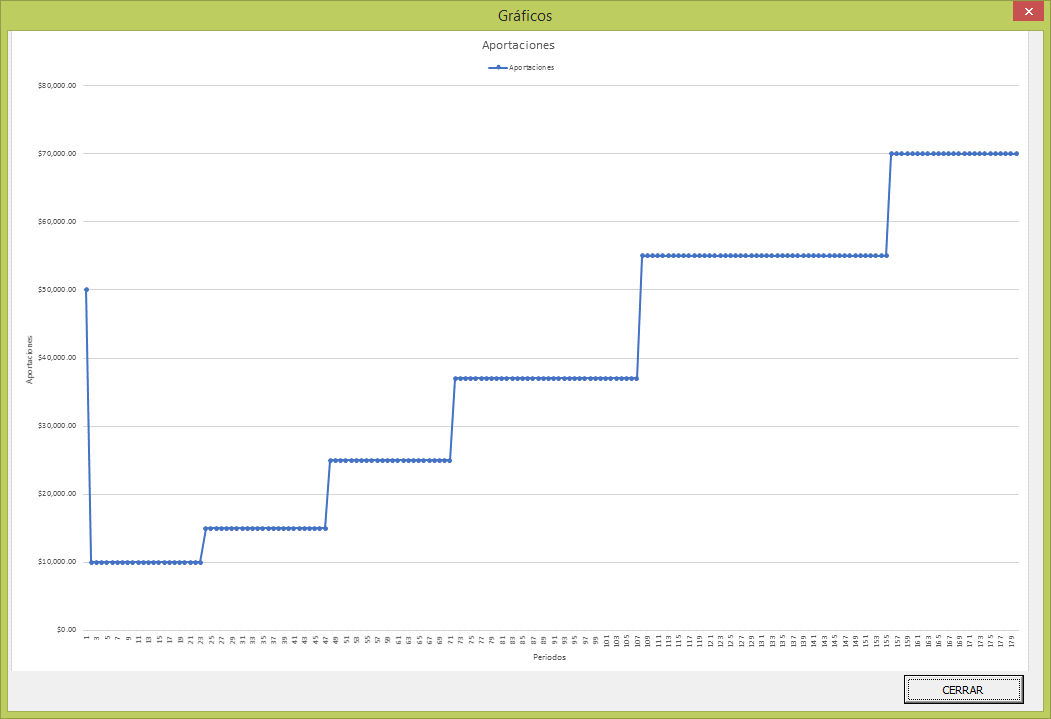

Código del Formulario principal dividido en subprocedimientos o macros.

In [ ]:
'Instrucciones al iniciarse el formulario
Private Sub UserForm_Initialize()
Hoja1.Range("A2:I5202").Clear 'Limpiar calculo anterior si aún sigue

'Llenar combobox de periodos
Dim a As Integer
For a = 1 To 5200
    ComboBox1.AddItem a
Next

'Deshabilitar espacios para agregar cambios antes de ingresar datos iniciales
UserForm6.PeriodoMonto.Locked = True
UserForm6.NvoMonto.Locked = True
UserForm5.PeriodoTasa.Locked = True
UserForm5.NvaTasa.Locked = True
UserForm4.PeriodoRetiro.Locked = True
UserForm4.Monto_retiro.Locked = True

'Habilitar botón para guardar datos iniciales
Guardar.Locked = False

'Agregar tips a textboxes diciendo que primero se deben guardar datos iniciales
Me.ComboBox1.ControlTipText = "Puede teclearlo o seleccionarlo"

'Deshabilitar espacios donde aparecen los resultados
capital_final.Locked = True
ahorro.Locked = True

End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro para guardar datos iniciales
Private Sub Guardar_Click()
Workbooks("Calculadora Capital Futuro aportaciones y tasa variable arrays newlayout.xlsm").Activate 'Prevenir editar otro libro abierto

With Hoja1
'Declaración de variables
Dim i As Integer
Dim P As Integer
Dim Rate As Double
Dim Payment As Long
Dim iI As Integer
Dim CO As Integer
Dim iCO As Integer
Dim Pay0 As Long

'Asegurarse de que se llenen todos los campos iniciales evitando así un error
If ComboBox1 = "" Or Tasa = "" Or Aportacion = "" Or Capital_inicial = "" Then
MsgBox "Faltan casillas por llenar", vbCritical, "FUTURE WEALTH ESTIMATOR"
Exit Sub
End If

'Establecer limite de periodos para eficientización de cálculos
If ComboBox1 > 5200 Then
MsgBox "El numero maximo de periodos es 5200", vbCritical, "FUTURE WEALTH ESTIMATOR"
Exit Sub
End If

'Agregar datos iniciales a listbox para consulta
Me.ListBox1.AddItem ComboBox1 & " " & "periodos"
Me.ListBox1.AddItem Tasa & "%" & " " & "de tasa de rendimiento"
Me.ListBox1.AddItem Aportacion & "$" & " " & "de aportaciones iniciales"
Me.ListBox1.AddItem Capital_inicial & "$" & " " & "de capital inicial invertido"

'mapeo de captura con contador
i = 3 'porque los registros inician el la fila 3
iCO = 4 'Contador para aportaciones después del capital inicial
P = ComboBox1.Value
iI = ComboBox1.Value  'Contador inverso para periodos restantes

On Error GoTo longlongoverflow: 'Evitar error de desbordamiento

Rate = Tasa.Value
Payment = Aportacion.Value
Pay0 = Capital_inicial.Value

GoTo nooverflow 'si no hay desbordamiento saltar error handler

longlongoverflow:
    MsgBox "Su cálculo ha superado los limites para cantidades de VBA", vbCritical
    Exit Sub

nooverflow:

'captura de variables en hoja
Dim ppp As Integer
ReDim periods_array(1 To P) As Integer
ReDim left_periods_array(1 To P) As Integer
'ReDim payments_array(2 To P) As Long
ppp = P + 2

For j = 1 To P
    left_periods_array(j) = iI
    iI = iI - 1
Next j
.Range("B3:B" & ppp) = WorksheetFunction.Transpose(left_periods_array)
    
For j = 1 To P
    periods_array(j) = j
Next j
.Range("A3:A" & UBound(periods_array) + 2) = WorksheetFunction.Transpose(periods_array)

.Range("D3").Value = Pay0
.Range("D3").NumberFormat = "$#,##0.00"
.Range("D4:D" & ppp).Value = Payment
.Range("D4:D" & ppp).NumberFormat = "$#,##0.00"
.Range("C3:C" & ppp).Value = Rate

End With

Guardar.Locked = True 'Deshabilitar el boton de guardar para evitar errores de cálculo

End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro para hacer el cálculo.
Private Sub Calcular_Click()
With Hoja1

'Declaración de variables.
Dim P As Integer
Dim C As Integer
Dim i As Double
Dim t As Integer
Dim pp As Integer
Dim LastsavesRow As Integer
Dim savessum As Double
Dim answer As Long
Dim Last_accRow As Integer
Dim lrow As Integer

'Evitar error no permitiendo ejecutar la macro sin datos guardados.
If ComboBox1 = "" Or Tasa = "" Or Aportacion = "" Or Capital_inicial = "" Then
    MsgBox "No ha guardado los parametros iniciales ni ha agregado cambios", vbCritical, "FUTURE WEALTH ESTIMATOR"
    Exit Sub
End If

'Si no se han agregado cambios en los datos (detectados en listbox de consulta) preguntar si aún así se desea hacer el "cálculo".
If ListBox1.ListCount < 5 Then
    answer = MsgBox("No ha agregado ningun cambio de tasa, de aportaciones ni retiros, ¿Desea continuar?", vbYesNo, "FUTURE WEALTH ESTIMATOR") 'MsgBox "No ha agregado ningun cambio de tasa ni de aportaciones, ¿Desea continuar?", vbYesNo, "FUTURE WEALTH ESTIMATOR"
    If answer = vbNo Then
        Exit Sub
    End If
End If

Dim R, Col As Integer
Dim cap_array() As LongLong
Dim features_array As Variant

lrow = Hoja1.Cells(5300, 1).End(xlUp).Row

features_array = Hoja1.Range("A3:F" & lrow) 'array bi-dimensional para almacenar datos iniciales
ReDim cap_array(1 To (lrow - 2))

'Calcular capital acumulado en cada periodo con cambios y retiros Sin loops en rangos
On Error GoTo longlongoverflow 'Evitar error de desbordamiento

cap_array(1) = features_array(1, 4) * (1 + (features_array(1, 3) / 100)) - features_array(1, 6)
For R = 2 To UBound(features_array, 1)
    cap_array(R) = (features_array(R, 4) + cap_array(R - 1)) * (1 + (features_array(R, 3) / 100)) - features_array(R, 6)
Next R
Hoja1.Range("G3:G" & lrow) = Application.WorksheetFunction.Transpose(cap_array)

GoTo nooverflow 'si no hay desbordamiento saltar error handler

longlongoverflow:
    MsgBox "Su cálculo ha superado los limites para cantidades de VBA", vbCritical
    Exit Sub
    
nooverflow:
'Calcular el acumulado solo ahorrado sin loops en rangos
cap_array(1) = features_array(1, 4) - features_array(1, 6)
For R = 2 To UBound(features_array, 1)
    cap_array(R) = (features_array(R, 4) + cap_array(R - 1)) - features_array(R, 6)
Next R
Hoja1.Range("H3:H" & lrow) = Application.WorksheetFunction.Transpose(cap_array)

Dim savings_arr As Variant
Dim returns_arr As Variant
Dim invest_arr As Variant
savings_arr = Hoja1.Range("H3:H" & lrow)
invest_arr = Hoja1.Range("G3:G" & lrow)

ReDim returns_arr(1 To (lrow - 2))

For R = 1 To UBound(features_array, 1)
    returns_arr(R) = invest_arr(R, 1) - savings_arr(R, 1)
Next R

Hoja1.Range("I3:I" & lrow) = Application.WorksheetFunction.Transpose(returns_arr)

 'Variables de mapeo y totales para mostrar resultados.
Last_accRow = .Cells(Rows.Count, 7).End(xlUp).Row
LastsavesRow = .Cells(Rows.Count, 4).End(xlUp).Row
 
'Mostrar capital formado y solo ahorros en el formulario.
capital_final.Value = Format(.Range("G" & Last_accRow).Value, "$#,##0.00")
ahorro.Value = Format((WorksheetFunction.Sum(.Range("D1:D" & LastsavesRow)) - WorksheetFunction.Sum(.Range("F1:F5203"))), "$#,##0.00")
 
End With

'Bloquear todos los botones para modificar calculos generandose nuevos resultados incorrectos
Calcular.Locked = True
CommandButton1.Locked = True
CommandButton2.Locked = True
CommandButton3.Locked = True
Guardar.Locked = True
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'macro para hacer un nuevo calculo, limpia los campos y llama al reinicio del formulario
Private Sub Nuevo_calc_Click()
ComboBox1 = ""
Tasa = ""
Aportacion = ""
Capital_inicial = ""
'PeriodoTasa = ""
'NvaTasa = ""
'PeriodoMonto = ""
'NvoMonto = ""
capital_final = ""
ahorro = ""
ListBox1.Clear

Calcular.Locked = False
CommandButton1.Locked = False
CommandButton2.Locked = False
CommandButton3.Locked = False
Guardar.Locked = False


Call UserForm_Initialize
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Botón para mostrar las opciones de los gráficos en otro formulario
Private Sub Graficos_command_Click()
UserForm2.Show
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Botón para cerrar el formulario principal
Private Sub Cerrar_Click()
    Unload Me
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Macro para darle formato de moneda al campo de aportaciones y para aclarar el ingreso de solo carácteres númericos
Private Sub Aportacion_AfterUpdate()

If Not IsNumeric(Aportacion.Value) Then
    Aportacion = ""
    MsgBox "Ingrese solo valores númericos"
Else
    Aportacion = Format(Aportacion, "$#,##0.00")
End If
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Macro para darle formato de moneda al campo de capital inicial y para aclarar el ingreso de solo carácteres númericos
Private Sub Capital_inicial_AfterUpdate()
If Not IsNumeric(Capital_inicial.Value) Then
    Capital_inicial = ""
    MsgBox "Ingrese solo valores númericos"
Else
    Capital_inicial = Format(Capital_inicial, "$#,##0.00")
End If
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Botón para mostrar campos de agregar retiro
Private Sub CommandButton1_Click()
UserForm4.Show
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Botón para mostrar campos de agregar cambio en tasa de rendimiento
Private Sub CommandButton2_Click()
UserForm5.Show
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Botón para mostrar campos de agregar cambio en aportaciones
Private Sub CommandButton3_Click()
UserForm6.Show
End Sub


Módulo para cargar y mostrar formulario desde un botón en la hoja.

In [ ]:
'Botón para cargar formulario principal
Sub RectangleRoundedCorners1_Click()
Load UserForm1
UserForm1.Show
End Sub

Formulario para agregar retiros.

In [ ]:
'Macro para agregar retiro
Private Sub add_withdraw_Click()
With Hoja1

Dim withdraw As Long
Dim Period_withdraw As Integer
Dim no_conflict_withdraw_period As Integer

'Asegurarse de que se llenen ambos campos para evitar un error
If Monto_retiro.Value = "" Or PeriodoRetiro.Value = "" Then
MsgBox "Espacio(s) por llenar, si no puede editar primero debe GUARDAR los datos iniciales", vbCritical, "FUTURE WEALTH ESTIMATOR"
Exit Sub
End If

'Agregar un '0' antes del periodo de retiro por motivos de interpretación de VBA al compararlo con el total de periodos.
no_conflict_withdraw_period = "0" & PeriodoRetiro

'Evitar que se agregue un retiro en un periodo inexistente o mayor al total.
If no_conflict_withdraw_period > UserForm1.ComboBox1 Then
    MsgBox "Sólo hay" & " " & ComboBox1 & " " & "periodos en este cálculo", vbCritical, "FUTURE WEALTH ESTIMATOR"
    Exit Sub
End If

'Agregar retiro a listbox para consulta.
UserForm1.ListBox1.AddItem "Retiro de" & " " & Monto_retiro & " " & "en el periodo" & " " & (Me.PeriodoRetiro)

withdraw = Monto_retiro.Value
Period_withdraw = Me.PeriodoRetiro.Value

'Agregar retiro a la hoja, aquí solo se captura en el periodo indicado y no en todos a partir del mismo.
.Range("F" & (Period_withdraw + 2)).Value = withdraw

End With

'Vaciar espacios para facilitar el ingreso de nuevos cambios.
PeriodoRetiro = ""
Monto_retiro = ""
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'macro para dar formato de moneda al monto
Private Sub Monto_retiro_AfterUpdate()
Monto_retiro = Format(Monto_retiro, "$#,##0.00")
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro para prevenir añadir cambios sin antes guardar datos iniciales
Private Sub UserForm_Activate()
If UserForm1.ListBox1.ListCount = 0 Then
    PeriodoRetiro.Locked = True
    Monto_retiro.Locked = True
    PeriodoRetiro.ControlTipText = "Para editar debe primero GUARDAR los datos iniciales"
    Monto_retiro.ControlTipText = "Para editar debe primero GUARDAR los datos iniciales"
Else
    PeriodoRetiro.Locked = False
    Monto_retiro.Locked = False
End If
End Sub


Formulario para agregar cambio en tasa de rendimiento.

In [ ]:
'Macro para agregar cambios de tasa
Private Sub add_rate_change_Click()
With Hoja1

Dim Newrate As Double
Dim Rateperiod As Integer
Dim P As Integer
Dim noconflictrateperiod As Integer

'Asegurarse de que se llenen ambos campos para evitar un error
If NvaTasa.Value = "" Or PeriodoTasa.Value = "" Then
MsgBox "Espacio(s) por llenar, si no puede editar primero debe GUARDAR los datos iniciales", vbCritical, "FUTURE WEALTH ESTIMATOR"
Exit Sub
End If

'Agregar un '0' antes del periodo de cambio por motivos de interpretación de VBA al compararlo con el total de periodos.
noconflictrateperiod = "0" & PeriodoTasa

'Evitar que se agregue un cambio en un periodo inexistente o mayor al total.
If noconflictrateperiod > UserForm1.ComboBox1 Then
    MsgBox "Sólo hay" & " " & ComboBox1 & " " & "periodos en este cálculo", vbCritical, "FUTURE WEALTH ESTIMATOR"
    Exit Sub
End If

'Agregar cambio a listbox para consulta
UserForm1.ListBox1.AddItem NvaTasa & "%" & " " & "de rendimiento a partir del periodo" & " " & (Me.PeriodoTasa)

P = UserForm1.ComboBox1.Value
Newrate = NvaTasa.Value
Rateperiod = PeriodoTasa.Value

'Agregar cambio a la tabla de cálculo
.Range("C" & (Rateperiod + 2) & ":C" & (P + 2)).Value = Newrate
 
End With

'Vaciar espacios para facilitar el ingreso de nuevos cambios
NvaTasa = ""
PeriodoTasa = ""
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro para prevenir añadir cambios sin antes guardar datos iniciales
Private Sub UserForm_Activate()
If UserForm1.ListBox1.ListCount = 0 Then
    PeriodoTasa.Locked = True
    NvaTasa.Locked = True
    PeriodoTasa.ControlTipText = "Para editar debe primero GUARDAR los datos iniciales"
    NvaTasa.ControlTipText = "Para editar debe primero GUARDAR los datos iniciales"
Else
    PeriodoTasa.Locked = False
    NvaTasa.Locked = False
End If
End Sub

Formulario para agregar cambios en aportaciones.

In [ ]:
'Macro para agregar cambios de aportaciones
Private Sub Agregar_Click()

With Hoja1

Dim NewPayment As Long
Dim paymentperiod As Integer
Dim P As Integer
Dim NoconflictMontoperiod As Integer

'Asegurarse de que se llenen ambos campos para evitar un error
If NvoMonto.Value = "" Or PeriodoMonto.Value = "" Then
MsgBox "Espacio(s) por llenar, si no puede editar primero debe GUARDAR los datos iniciales", vbCritical, "FUTURE WEALTH ESTIMATOR"
Exit Sub
End If

'Agregar un '0' antes del periodo de cambio por motivos de interpretación de VBA al compararlo con el total de periodos.
NoconflictMontoperiod = "0" & PeriodoMonto

'Evitar que se agregue un cambio en un periodo inexistente o mayor al total.
If NoconflictMontoperiod > UserForm1.ComboBox1 Then
MsgBox "Sólo hay" & " " & ComboBox1 & " " & "periodos en este cálculo", vbCritical, "FUTURE WEALTH ESTIMATOR"
Exit Sub
End If

'Agregar cambio a listbox para consulta
UserForm1.ListBox1.AddItem NvoMonto & " " & "de aportación a partir del periodo" & " " & (Me.PeriodoMonto)

P = UserForm1.ComboBox1.Value
NewPayment = NvoMonto.Value
paymentperiod = PeriodoMonto.Value

'Agregar cambio a la tabla de cálculo
.Range("D" & (paymentperiod + 2) & ":D" & (P + 2)).Value = NewPayment

End With

'Vaciar espacios para facilitar el ingreso de nuevos cambios
NvoMonto = ""
PeriodoMonto = ""
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'macro para dar formato de moneda al monto
Private Sub NvoMonto_AfterUpdate()
NvoMonto = Format(NvoMonto, "$#,##0.00")
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Macro para prevenir añadir cambios sin antes guardar datos iniciales
Private Sub UserForm_Activate()
If UserForm1.ListBox1.ListCount = 0 Then
    PeriodoMonto.Locked = True
    NvoMonto.Locked = True
    PeriodoMonto.ControlTipText = "Para editar debe primero GUARDAR los datos iniciales"
    NvoMonto.ControlTipText = "Para editar debe primero GUARDAR los datos iniciales"
Else
    PeriodoMonto.Locked = False
    NvoMonto.Locked = False
End If
End Sub


Módulo con macros para construir y mostrar gráficos.

In [ ]:
'Construir Gráfico "inversión vs ahorro" y pegarlo en formulario.
Sub Inversion_vs_ahorro_graf()

'Variables para referenciar gráfico, guardarlo como imágen, mapear datos y alimentarlos al gráfico.
Dim Last_accRow As Integer
Dim GrafAhorrovsInversion As ChartObject
Dim serie_1 As Range
Dim serie_2 As Range
Dim tmpimage As String

With Hoja1

'Variable para encontrar ultimo valor de una columna (en este caso resultados finales).
Last_accRow = .Cells(Rows.Count, 7).End(xlUp).row
'Asignar los ahorros y capital acumulados respectivamente a las dos series del gráfico.
Set serie_1 = .Range("G3:G" & Last_accRow)
Set serie_2 = .Range("H3:H" & Last_accRow)

'Insertar gráfico y establecer medidas y ubicación
ThisWorkbook.Sheets("Calculo (No editar)").Select
Set GrafAhorrovsInversion = ActiveSheet.ChartObjects.Add(Left:=200, Width:=780, Top:=60, Height:=480)
With GrafAhorrovsInversion.Chart

    .ChartType = xlLineMarkers 'estilo del gráfico.
    .ClearToMatchStyle         'permitir editar detalles.
    .ChartStyle = 332          'editar estilo de lineas.
    
    'Ingresar las series previamente establecidas y sus nombres.
    .SeriesCollection.NewSeries
    .SeriesCollection(1).Name = "Capital Invertido"
    .SeriesCollection(1).Values = serie_1
    .SeriesCollection.NewSeries
    .FullSeriesCollection(2).Name = "Sólo Ahorro"
    .FullSeriesCollection(2).Values = serie_2
    .HasTitle = True
    .ChartTitle.Characters.Text = "Inversión vs Ahorro"
    .Axes(xlCategory, xlPrimary).HasTitle = True
    .Axes(xlCategory, xlPrimary).AxisTitle.Characters.Text = "Periodos"
    .Axes(xlValue, xlPrimary).HasTitle = True
    .Axes(xlValue, xlPrimary).AxisTitle.Characters.Text = "Monto Acumulado"
    .Legend.Position = xlLegendPositionTop 'Posición del titulo principal.

    'Guardar gráfico como imagen y asignarla al formulario 3.
    tmpimage = ThisWorkbook.Path & Application.PathSeparator & "imgChart.gif"
    Hoja1.ChartObjects(1).Chart.Export fileName:=tmpimage, filtername:="GIF"
    UserForm3.Image1.Picture = LoadPicture(tmpimage)
    
    'Eliminar gráfico una vez está asignada su imágen al formulario y lanzarlo.
    ActiveSheet.ChartObjects(1).Delete
    UserForm3.Show
End With
End With
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Construir Gráfico "inversión vs ahorro" estilo columnas apiladas y pegarlo en formulario.
Sub Inversion_vs_ahorro_column_graf()

'Variables para referenciar gráfico, guardarlo como imágen, mapear datos y alimentarlos al gráfico.
Dim Last_accRow As Integer
Dim GrafAhorrovsInversion As ChartObject
Dim serie_1 As Range
Dim serie_2 As Range
Dim tmpimage As String

With Hoja1

'Variable para encontrar ultimo valor de una columna (en este caso resultados finales).
Last_accRow = .Cells(Rows.Count, 8).End(xlUp).row
'Asignar los ahorros y capital acumulados respectivamente a las dos series del gráfico.
Set serie_1 = .Range("H3:H" & Last_accRow)
Set serie_2 = .Range("I3:I" & Last_accRow)

'Insertar gráfico y establecer medidas y ubicación
ThisWorkbook.Sheets("Calculo (No editar)").Select
Set GrafAhorrovsInversion = ActiveSheet.ChartObjects.Add(Left:=200, Width:=780, Top:=60, Height:=480)
With GrafAhorrovsInversion.Chart

    .ChartType = xlColumnStacked 'estilo del gráfico.
    .ClearToMatchStyle         'permitir editar detalles.
    .ChartStyle = 301        'editar estilo de columnas a brillosas.
    
    'Ingresar las series previamente establecidas y sus nombres.
    .SeriesCollection.NewSeries
    .SeriesCollection(1).Name = "Capital Invertido"
    .SeriesCollection(1).Values = serie_1
    .SeriesCollection.NewSeries
    .FullSeriesCollection(2).Name = "Rendimientos acumulados ganados"
    .FullSeriesCollection(2).Values = serie_2
    .HasTitle = True
    .ChartTitle.Characters.Text = "Inversión vs Ahorro"
    .Axes(xlCategory, xlPrimary).HasTitle = True
    .Axes(xlCategory, xlPrimary).AxisTitle.Characters.Text = "Periodos"
    .Axes(xlValue, xlPrimary).HasTitle = True
    .Axes(xlValue, xlPrimary).AxisTitle.Characters.Text = "Monto Acumulado"
    .Legend.Position = xlLegendPositionTop 'Posición del titulo principal.

    'Guardar gráfico como imagen y asignarla al formulario 3.
    tmpimage = ThisWorkbook.Path & Application.PathSeparator & "imgChart.gif"
    Hoja1.ChartObjects(1).Chart.Export fileName:=tmpimage, filtername:="GIF"
    UserForm3.Image1.Picture = LoadPicture(tmpimage)
    
    'Eliminar gráfico una vez está asignada su imágen al formulario y lanzarlo.
    ActiveSheet.ChartObjects(1).Delete
    UserForm3.Show
End With
End With
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Construir Gráfico "Aportaciones" y pegarlo en formulario.
Sub aportaciones_graf()

'Variables para referenciar gráfico, guardarlo como imágen, mapear datos y alimentarlos al gráfico.
Dim Last_accRow As Integer
Dim GrafAportaciones As ChartObject
Dim serie_1 As Range
Dim tmpimage As String

With Hoja1

'Variable para encontrar ultimo valor de una columna (en este caso resultados finales).
Last_accRow = .Cells(Rows.Count, 4).End(xlUp).row
'Asignar las aportaciones a la serie de datos
Set serie_1 = .Range("D3:D" & Last_accRow)

'Insertar gráfico y establecer medidas y ubicación
ThisWorkbook.Sheets("Calculo (No editar)").Select
Set GrafAportaciones = ActiveSheet.ChartObjects.Add(Left:=200, Width:=780, Top:=60, Height:=480)
With GrafAportaciones.Chart

    .ChartType = xlLineMarkers 'estilo del gráfico.
    .ClearToMatchStyle         'permitir editar detalles.
    .ChartStyle = 332          'editar estilo de lineas.
    
    'Ingresar la serie previamente establecida y su nombre.
    .SeriesCollection.NewSeries
    .SeriesCollection(1).Name = "Aportaciones"
    .SeriesCollection(1).Values = serie_1
    .HasTitle = True
    .ChartTitle.Characters.Text = "Aportaciones"
    .Axes(xlCategory, xlPrimary).HasTitle = True
    .Axes(xlCategory, xlPrimary).AxisTitle.Characters.Text = "Periodos"
    .Axes(xlValue, xlPrimary).HasTitle = True
    .Axes(xlValue, xlPrimary).AxisTitle.Characters.Text = "Aportaciones"
    .Legend.Position = xlLegendPositionTop
    
    'Guardar gráfico como imagen y asignarla al formulario 3.
    tmpimage = ThisWorkbook.Path & Application.PathSeparator & "imgChart.gif"
    Hoja1.ChartObjects(1).Chart.Export fileName:=tmpimage, filtername:="GIF"
    UserForm3.Image1.Picture = LoadPicture(tmpimage)

    'Eliminar gráfico una vez está asignada su imágen al formulario y lanzarlo.
    ActiveSheet.ChartObjects(1).Delete
    UserForm3.Show
    
End With
End With
End Sub

Código del formulario 2 (Botones para llamar a generación y presentación de gráficos)

In [ ]:
'Botón para mostrar gráfico de aportaciones individuales
Private Sub apor_graf_comm_Click()
Call aportaciones_graf
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Botón para mostrar gráfico de ahorros y capital
Public Sub Comm_graf_invaho_Click()
Call Inversion_vs_ahorro_graf
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Botón para mostrar gráfico de capital y rendimientos
Private Sub comm_graf_columns_Click()
Call Inversion_vs_ahorro_column_graf
End Sub

Código Formulario 3 (El que almacena los gráficos)

In [ ]:
'Botón para cerrar gráfico
Private Sub CommandButton1_Click()
Unload Me
End Sub
'Recordar que todos los precedimientos de generación y presentación de los gráficos ya están realizados en un módulo dedicado